# Data and basic explore

For this learning difficulty assessment, we will be using the Bank Marketing data set ([Moro et al., 2014](http://dx.doi.org/10.1016/j.dss.2014.03.001))

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [3]:
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.select_dtypes(exclude=[float, int]).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
for c in data.select_dtypes(exclude=[float, int]).columns:
    print(f"""\n===={c}====""")
    print(data[c].value_counts())


====job====
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

====marital====
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

====education====
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

====default====
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

====housing====
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

====loan====
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

====co

In [7]:
data.groupby('y').agg(['mean', 'median'])

age           duration         campaign              pdays         \
          mean median        mean median      mean median        mean median   
y                                                                              
no   39.911185     38  220.844807  163.5  2.633085      2  984.113878    999   
yes  40.913147     37  553.191164  449.0  2.051724      2  792.035560    999   

     previous        emp.var.rate        cons.price.idx         cons.conf.idx  \
         mean median         mean median           mean  median          mean   
y                                                                               
no   0.132374      0     0.248875    1.1      93.603757  93.918    -40.593097   
yes  0.492672      0    -1.233448   -1.8      93.354386  93.200    -39.789784   

           euribor3m         nr.employed          
    median      mean median         mean  median  
y                                                 
no   -41.8  3.811491  4.857  5176.166600  5195.8  
yes  -40.4  2.123135  1.266  5095.115991  5099.1

# Assessment

We will do the assessment by comparing a trivial model - in this case a random model - and a simple model - univariate logistic regression.

In [8]:
from pskit.simple_models import UnivariateLogisticRegression, RandomClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['duration', 'y']), data['y'])

Evaluating model
              precision    recall  f1-score   support

          no       0.89      0.89      0.89      9146
         yes       0.10      0.10      0.10      1151

    accuracy                           0.80     10297
   macro avg       0.49      0.49      0.49     10297
weighted avg       0.80      0.80      0.80     10297

no: 0.49381768636709666
yes: 0.4938176863670967


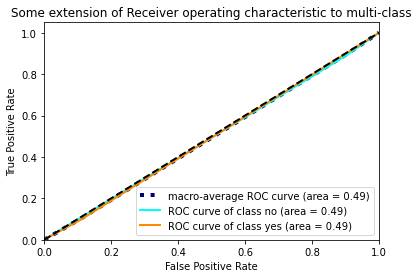

{'macro_auc': 0.4938176863670968,
 'auc_no': 0.49381768636709666,
 'auc_yes': 0.4938176863670967,
 'precision': array([0.88684182, 0.10053381]),
 'recall': array([0.88945987, 0.0981755 ]),
 'f1_score': array([0.88814892, 0.09934066]),
 'support': array([9146, 1151])}

In [10]:
# Random classifier
rc = RandomClassifier()
rc.fit(X_train, y_train)
rc.evaluate(X_test, y_test)

Evaluating model


/Users/kientt15/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kientt15/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kientt15/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.89      1.00      0.94      9146
         yes       0.00      0.00      0.00      1151

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297

no: 0.7551160126022057
yes: 0.7551160126022057


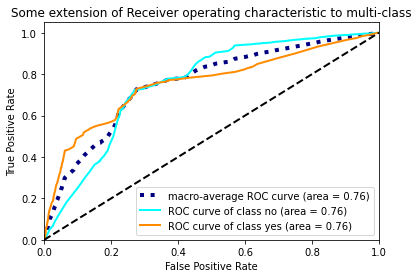

/Users/kientt15/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'macro_auc': 0.7551277075232629,
 'auc_no': 0.7551160126022057,
 'auc_yes': 0.7551160126022057,
 'precision': array([0.88821987, 0.        ]),
 'recall': array([1., 0.]),
 'f1_score': array([0.94080132, 0.        ]),
 'support': array([9146, 1151])}

In [11]:
# Univariate logistic regression. 
ulr = UnivariateLogisticRegression()
ulr.set_col('euribor3m') # We choose `euribor3m` since we see some difference in mean and median
ulr.fit(X_train, y_train)
ulr.evaluate(X_test, y_test)

We can see AUC improve significantly from random model to a simple model. However, accuracy, precision, recall, and f1_score doesn't have better performance. 

=> Thus, we can have initial conclusion that the classification problem is not hard to learn, but at the same time have a lot of potential to improve performance

# Notes

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt